## CNN ( Convolutional Neural Network ) : 합성곱 신경망

## FC Layer ( Fully Connected Layer )
> 이전 layer의 모든 node가 다음 layer의 모든 node에 연결되어
> 학습되는 layer구조 (신경망의 노드가 연결되 여러 layer를 이루는 구조를 일컫는다)
> Fc Layer를 다른말로 Dense Layer라고 한다!
     
### 지금까지 우리가 작업한 신경망은 모두 FC Layer를 이용하고 있다.

### FC Layer의 특징은 MNIST의 예제처럼 입력데이터가 1차원으로 한정된다.
> 즉 각각의 이미지가 1차원으로 표현이 되어야 한다.
> 그래서 2차원 이미지를 우리가 1차원으로 변환시켜서 사용한 것이다.

### 우리가 사용한 MNIST예제는 상당히 가단한 이미지 학습, 예측 예제.

### 이미지 학습의 가장 큰 문제는
### 이미지가 살짝 휘어있거나, 크기가 제 각각이거나, 변형이 조금만 생겨도
### 학습이 너무 힘들어진다.

### 이런 경우에는 Training data가 굉장히 많이 필요하고
### 추가적으로 학습할 때 많은 시간을 요구하게 된다.

### 방법론 연구의 시작

## 방법론 연구의 시작

### 사람이 학습하는 방식을 모델링했다.
### 이미지의 픽셀값을 그대로 입력하는게 아니라
### 이미지를 대표하는 특징들을 도출해서 신경망에 여러개
### 넣어서 학습하는 방식이다!

### 1장이 컬러사진은  width, height, color(depth) 3차원으로 표현
### 총 입력에 여러장이 사진이 사용되기 때문에 입력데이터는 4차원으로 표현

### 실제 이미지 한장은 3차원이고 이놈을 flatten시켜서 1차원으로 표현해야 한다.
### 크기를 조절해야 되기 때문에 공간에 대한 데이터를 유실할 우려가 있다.
### 이런 데이터 유실때문에 학습과 예측에 문제가 발생하게 된다.

### 공간데이터의 유실을 없애고 이미지의 특성을 추출해서 학습이 용이하게 
### 만드는 방식 => CNN



In [31]:
# Code로 알아보자!
# 사용되어지는 함수부터 알아보자!
# Sample CNN

import tensorflow as tf
import numpy as np

# 입력데이터 형식 : 3*3*1
image = np.arange(1,10,dtype=np.float32).reshape(1,3,3,1)
image

# Activation map을 위한 filter를 정의(형태) : (width, height, color, filter개수)
# filter (2,2,1,3)
weight = np.array([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]], dtype=np.float32)
print("weight의 shape : {}".format(weight.shape)) # weight의 shape : (2, 2, 1, 3)

# stride = 1 (가로, 세로 1씩 움직이자)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="VALID") # VALID : 패딩하지않는다(사이즈 줄어든다.)
                                                                         # SAME : 패딩한다 (사이즈 유지)
print("conv2d의 shape : {}".format(conv2d.shape)) # conv2d의 shape : (1, 2, 2, 3)

sess = tf.Session()
conv2d = sess.run(conv2d)
print(conv2d)
# pooling layer
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,1,1,1], padding="SAME")
print("pool의 shape : {}".format(pool.shape))
pool = sess.run(pool)
print(pool)



weight의 shape : (2, 2, 1, 3)
conv2d의 shape : (1, 2, 2, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]]]]
pool의 shape : (1, 2, 2, 3)
[[[[ 28. 280. -12.]
   [ 28. 280. -16.]]

  [[ 28. 280. -24.]
   [ 28. 280. -28.]]]]


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(1, 28, 28, 1)
conv2d의 shape : (1, 14, 14, 5)
pool의 shape : (5, 14, 14, 1)


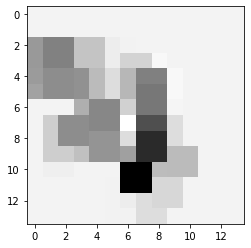

In [31]:
# Convolution 결과 이미지가 원본이미지에 비해 어떻게 다른지 
# 눈으로 확인해 보자!

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

   
# data loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap="Greys")

# 해당 이미지를 Convolution 처리를 해보자!
# 입력데이터 => (이미지 개수, width, height, color) => 1,3,3,1
img = img.reshape(-1,28,28,1)
print(img.shape)

# Activation map을 위한 filter를 정의(형태) : (width, height, color, filter개수)
W = tf.Variable(tf.random_normal([3,3,1,5]), name="filter1")

conv2d = tf.nn.conv2d(img, W, strides=[1,2,2,1], padding="SAME")
print("conv2d의 shape : {}".format(conv2d.shape)) # (1, 14, 14, 5)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
conv2d = sess.run(conv2d)


# 이미지를 표현하기 위해서 축을 전환
# (1,14,14,5) => (5,14,14,1)
conv2d_img = np.swapaxes(conv2d,0,3)
conv2d_img.shape
plt.imshow(conv2d_img[4].reshape(14,14), cmap="Greys")

pool = tf.nn.max_pool(conv2d_img, ksize=[1,2,2,1], strides=[1,1,1,1], padding="SAME")
print("pool의 shape : {}".format(pool.shape))
pool = sess.run(pool)
pool_img = pool
pool_img.shape
plt.imshow(pool_img[2].reshape(14,14), cmap="Greys")

In [1]:
import tensorflow as tf
tf.__version__


'1.15.0'

In [7]:
# tensorflow-MNIST with CNN

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# Graph 초기화
tf.reset_default_graph()


# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

# Convolution Layer (Layer1)
x_img = tf.reshape(X, [-1,28,28,1]) # 몇장인지 모르고 28,28이고 색은 그레이스케일 1
W1 = tf.Variable(tf.random_normal([3,3,1,32]))
L1 = tf.nn.conv2d(x_img, W1, strides=[1,1,1,1], padding="SAME") # strides와 padding은 parameter값
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# Layer2
W2 = tf.Variable(tf.random_normal([3,3,32,64]))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

# 이렇게 만든 data를 FC Layer에 넣어서 학습!
L2 = tf.reshape(L2, [-1, 7*7*64])
#L2.shape # TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

W3 = tf.get_variable("weight3", shape=[7*7*64,256],
                        initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name="bias3")
_L3 = tf.nn.relu(tf.matmul(L2, W3)+b3)
L3 = tf.nn.dropout(_L3, keep_prob=drop_rate)

# Layer 4
W4 = tf.get_variable("weight4", shape=[256,256],
                        initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]), name="bias4")
_L4 = tf.nn.relu(tf.matmul(L3, W4)+b4)
L4 = tf.nn.dropout(_L4, keep_prob=drop_rate)

# Layer 5
W5 = tf.get_variable("weight5", shape=[256,10],
                        initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]), name="bias5")

# Hypothesis
logit = tf.matmul(L4, W5)+b5
H = tf.nn.relu(logit)

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                    labels = Y))

# train
train = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)

# Session & reset
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [9]:
L2.shape

(100, 10)

In [9]:
%%time
# 학습
num_of_epoch = 50
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = { X : batch_x,
                                                              Y : batch_y,
                                                              drop_rate : 0.75})
    if step % 5 == 0:
        print("Cost : {}".format(cost_val))

Cost : 0.6264487504959106
Cost : 0.06371894478797913
Cost : 0.10392849147319794
Cost : 0.024695362895727158
Cost : 0.05510765686631203
Cost : 0.10045552998781204
Cost : 0.008368580602109432
Cost : 0.05328496918082237
Cost : 0.07345348596572876
Cost : 0.21184097230434418


In [10]:
# accuracy
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("Accuracy : {}".format(sess.run(accuracy, feed_dict = { X : mnist.test.images,
                                                                Y : mnist.test.labels,
                                                                drop_rate : 1.0})))

Accuracy : 0.9830999970436096
